In [ ]:
# Connecting to GDrive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError("Gpu not")
print('Gpu found at {} '.format(device_name))

Gpu found at /device:GPU:0 


In [ ]:
# Checking GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Nov 27 17:33:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    52W / 400W |    632MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pickle

In [ ]:
%cd /content/gdrive/MyDrive/Master/Fall 22/DS Project/CornDataSet
!ls

/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Testing  Training  X_test.pickle  X_train.pickle  Y_test.pickle  Y_train.pickle


In [ ]:
# Loading Pickle Files
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

In [ ]:
import numpy as np
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)
y = np.array(Y_train)

In [ ]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import classification_report
from keras.layers.core import Dense, Flatten
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam


import matplotlib.pyplot as plt
import keras.optimizers
import numpy as np
import pandas as pd
import os
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, GlobalAveragePooling2D,Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import mobilenet_v2
from keras.layers import Input
import numpy as np
from keras import Model
import tensorflow as tf

In [ ]:
#Function to Plot Graphs
def plotGraphs(history,fold_no,epochs):
  %cd '/content/gdrive/MyDrive/Graphs/'
 #summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{fold_no} model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet_UfR_0-00_wThreshold_{epochs}epoch_{fold_no}fold_no_accuracyGraph.png')
  plt.show()
  #summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'{fold_no} model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'MobileNet_UfR_0-00_wThreshold_{epochs}epoch_{fold_no}fold_no_LossGraph.png')
  plt.show()

In [ ]:
#Defining custom Tebsorflow callback
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, valLoss_threshold, valAccuracy_threshold):
        super(MyThresholdCallback, self).__init__()
        self.valLoss_threshold = valLoss_threshold
        self.valAccuracy_threshold = valAccuracy_threshold
        

    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs["val_loss"] 
        val_accuracy = logs["val_accuracy"]
        if (val_loss <= self.valLoss_threshold) and (val_accuracy >= self.valAccuracy_threshold):
            #print(f'Total Epochs Completed: {logs["Epoch"]}')
            self.model.stop_training = True

my_callback = MyThresholdCallback(valLoss_threshold=1.0,valAccuracy_threshold=0.9)            

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/500
73/73 [==============================] - 13s 31ms/step - loss: 2.3878 - accuracy: 0.1437 - val_loss: 2.1084 - val_accuracy: 0.1416
Epoch 2/500
73/73 [==============================] - 1s 15ms/step - loss: 2.3956 - accuracy: 0.1459 - val_loss: 2.1084 - val_accuracy: 0.1416
Epoch 3/500
73/73 [==============================] - 1s 15ms/step - loss: 2.3890 - accuracy: 0.1351 - val_loss: 2.1084 - val_accuracy: 0.1416
Epoch 4/500
73/73 [==============================] - 1s 15ms/step - loss: 2.3658 - accuracy: 0.1394 - val_loss: 2.1084 - val_accuracy: 0.1416
Epoch 5/500
73/73 [==============================] - 1s 15ms/step - loss: 2.3803 - accuracy: 0.1463 - val_loss: 2.1084 - val_accuracy: 0.1416
Epoch 6/500
73/73 [==============================] - 1s 15ms/step - loss: 2.3778 - accuracy: 0.1407 - val_loss: 2.1084 - val_accuracy: 0.1416
Epoch 7/500
73/73 [==============================] - 1s 16ms/step - loss: 2.3384 - a

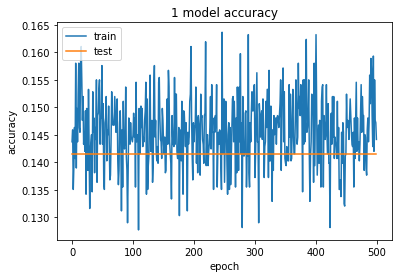

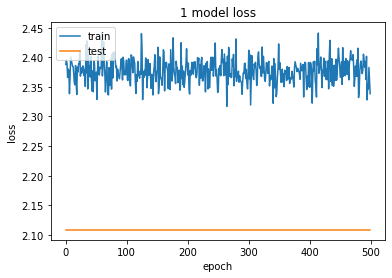

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_0-00_wThreshold/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 1: loss of 2.1198854446411133; accuracy of 13.798701763153076%
49/49 [==============================] - 2s 17ms/step
Classification report on Training data fold-1:
              precision    recall  f1-score   support

           0       0.04      0.00      0.00       928
           1       0.01      0.00      0.00       954
           2       0.17      0.90      0.29       410
           3       0.05      0.05      0.05       788

    accuracy                           0.13      3080
   macro avg       0.07      0.24      0.09      3080
weighted avg       0.05      0.13      0.05      3080

13/13 [==============================] - 0s 24ms/step
Classification report on Test data:-1
              precision    recall  f1-score   support

           0     

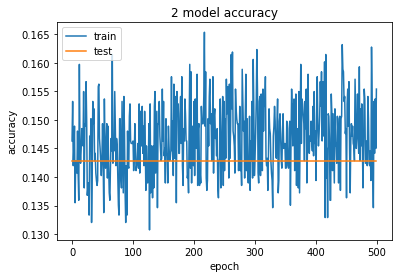

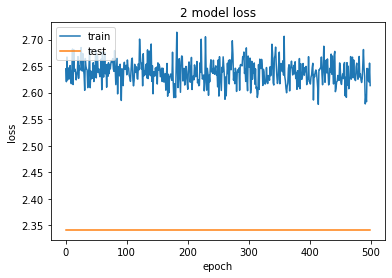

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_0-00_wThreshold/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 2: loss of 2.3508458137512207; accuracy of 14.28571492433548%
49/49 [==============================] - 2s 16ms/step
Classification report on Training data fold-2:
              precision    recall  f1-score   support

           0       0.24      0.18      0.21       928
           1       0.04      0.01      0.01       954
           2       0.11      0.57      0.19       410
           3       0.00      0.00      0.00       788

    accuracy                           0.13      3080
   macro avg       0.10      0.19      0.10      3080
weighted avg       0.10      0.13      0.09      3080

13/13 [==============================] - 0s 16ms/step
Classification report on Test data:-2
              precision    recall  f1-score   support

           0      

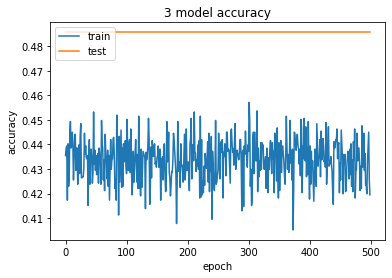

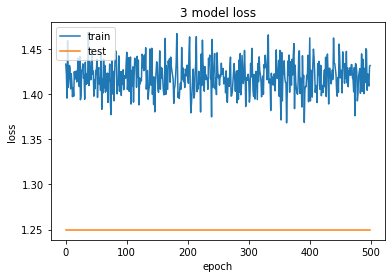

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_0-00_wThreshold/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 3: loss of 1.1657307147979736; accuracy of 52.11039185523987%
49/49 [==============================] - 1s 16ms/step
Classification report on Training data fold-3:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       928
           1       0.40      0.87      0.55       954
           2       0.00      0.00      0.00       410
           3       0.29      0.08      0.13       788

    accuracy                           0.51      3080
   macro avg       0.39      0.42      0.37      3080
weighted avg       0.46      0.51      0.44      3080

 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 0s 16ms/step
Classification report on Test data:-3
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       234
           1       0.40      0.87      0.55       238
           2       0.00      0.00      0.00       103
           3       0.30      0.09      0.14       197

    accuracy                           0.52       772
   macro avg       0.40      0.43      0.38       772
weighted avg       0.47      0.52      0.45       772



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/500
73/73 [==============================] - 5s 28ms/step - loss: 1.9878 - accuracy: 0.2139 - val_loss: 1.7231 - val_accuracy: 0.2351
Epoch 2/500
73/73 [==============================] - 1s 16ms/step - loss: 1.9391 - accuracy: 0.2368 - val_loss: 1.7231 - val_accuracy: 0.2351
Epoch 3/500
73/73 [==============================] - 1s 16ms/step - loss: 1.9359 - accuracy: 0.2251 - val_loss: 1.7231 - val_accuracy: 0.2351
Epoch 4/500
73/73 [==============================] - 1s 16ms/step - loss: 1.9640 - accuracy: 0.2368 - val_loss: 1.7231 - val_accuracy: 0.2351
Epoch 5/500
73/73 [==============================] - 1s 16ms/step - loss: 1.9213 - accuracy: 0.2455 - val_loss: 1.7231 - val_accuracy: 0.2351
Epoch 6/500
73/73 [==============================] - 1s 16ms/step - loss: 1.9889 - accuracy: 0.2113 - val_loss: 1.7231 - val_accuracy: 0.2351
Epoch 7/500
73/73 [==============================] - 1s 16ms/step - loss: 1.9913 - accuracy: 0.2281 - val_loss: 1.7231 - val_accuracy: 0.2351
Epoch 

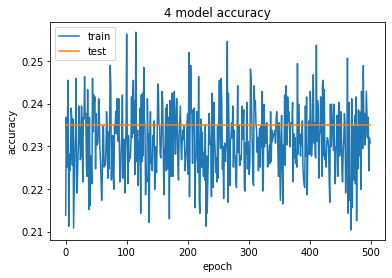

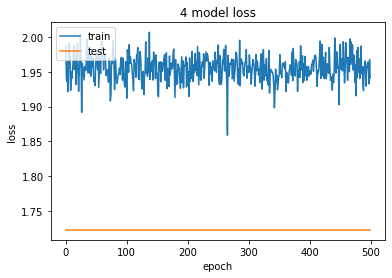

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_0-00_wThreshold/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 4: loss of 1.7552951574325562; accuracy of 19.805194437503815%
49/49 [==============================] - 2s 16ms/step
Classification report on Training data fold-4:
              precision    recall  f1-score   support

           0       0.15      0.19      0.17       928
           1       0.33      0.54      0.41       954
           2       0.02      0.01      0.01       410
           3       0.00      0.00      0.00       788

    accuracy                           0.23      3080
   macro avg       0.12      0.19      0.15      3080
weighted avg       0.15      0.23      0.18      3080

13/13 [==============================] - 0s 16ms/step
Classification report on Test data:-4
              precision    recall  f1-score   support

           0     

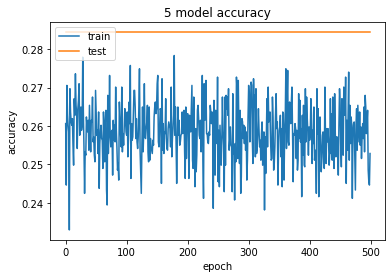

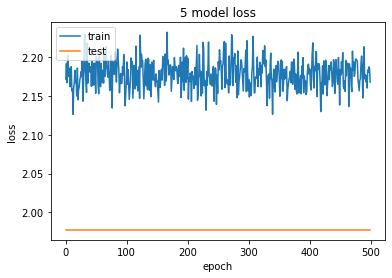

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_0-00_wThreshold/'
/content/gdrive/.shortcut-targets-by-id/1IHuykg0BGyCAuuHH2cavzizfmnvT0j5G/Master/Fall 22/DS Project/CornDataSet
Score for fold 5: loss of 1.9610732793807983; accuracy of 29.058441519737244%
49/49 [==============================] - 1s 16ms/step
Classification report on Training data fold-5:
              precision    recall  f1-score   support

           0       0.32      0.75      0.45       928
           1       0.97      0.21      0.35       954
           2       0.00      0.00      0.00       410
           3       0.00      0.00      0.00       788

    accuracy                           0.29      3080
   macro avg       0.32      0.24      0.20      3080
weighted avg       0.40      0.29      0.24      3080

 5/13 [==========>...................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 0s 16ms/step
Classification report on Test data:-5
              precision    recall  f1-score   support

           0       0.30      0.76      0.43       234
           1       1.00      0.22      0.36       238
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       197

    accuracy                           0.30       772
   macro avg       0.32      0.24      0.20       772
weighted avg       0.40      0.30      0.24       772

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Validation Loss: 2.1198854446411133 - Validation Accuracy: 13.798701763153076%
------------------------------------------------------------------------
> Fold 2 - Validation Loss: 2.3508458137512207 - Validation Accuracy: 14.28571492433548%
------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
inputs = X_train
targets = y
acc_per_fold = []
loss_per_fold = []
num_folds = 5
epochs = 500
train = 000

kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
  base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

  CLASSES = 4
  x = base_model.output
  x = GlobalAveragePooling2D(name='avg_pool')(x)
  x = Dropout(0.4)(x)
  predictions = Dense(CLASSES, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  for layer in model.layers:
    layer.trainable = False  

  optm = optimizers.Adam(learning_rate=0.001)    
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer= optm,
              metrics=['accuracy']
              )
  
  logs = f'/content/gdrive/MyDrive/Logs/MobileNet_Kfold/MobileNet_UfR_0-00_wThreshold_fold_no_{fold_no}/'

  
  history = model.fit(inputs, targets, batch_size=32, epochs=epochs, validation_split=0.25, callbacks= [my_callback],
                          use_multiprocessing=True)
  
  plotGraphs(history,fold_no,epochs)
  
  %cd f'/content/gdrive/MyDrive/Logs/ExcelLogs/MobileNet_UfR_0-00_wThreshold/'
  hist_df = pd.DataFrame(history.history)  
  hist_csv_file = f'MobileNet_UfR_0-00_wThreshold_Kfold_history_fold_{fold_no}.csv'
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  y_train_pred = model.predict(X_train, batch_size=64, verbose=1)
  y_train_pred_bool = np.argmax(y_train_pred, axis=1)
  print(f"Classification report on Training data fold-{fold_no}:")
  print(classification_report(y, y_train_pred_bool))

  y_pred = model.predict(X_test, batch_size=64, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print(f"Classification report on Test data:-{fold_no}")
  print(classification_report(Y_test, y_pred_bool))

  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
#print(f'Total Epochs Completed: {epochs}')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Validation Loss: {loss_per_fold[i]} - Validation Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------') 